#Imports

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving populacao_brasileira.csv to populacao_brasileira.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
df = pd.read_csv('populacao_brasileira.csv')
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


#1

Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
aleatória e ela não ser fluente em inglês. Considere fluente quem tem o
nível avançado.

In [ ]:
def probabilidade_complementar(df, proficiencia='Avançado'):
  total_pessoas = len(df)
  fluentes = df[df['nível de proficiência em inglês'] == proficiencia]
  num_fluentes = len(fluentes)

  num_nao_fluentes = total_pessoas - num_fluentes
  prob_nao_fluente = num_nao_fluentes / total_pessoas

  return prob_nao_fluente

probabilidade = probabilidade_complementar(df)
print(f'A probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês é de {probabilidade * 100:.2f}%')

A probabilidade de escolher uma pessoa aleatória e ela não ser fluente em inglês é de 65.60%


#2

Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
def probabilidade_renda(df, estados=['AL', 'PA'], renda_limite=5000):
  filtro_estados = df['estado'].isin(estados)
  df_filtrado = df[filtro_estados]

  total_pessoas = len(df_filtrado)
  pessoas_renda_alta = df_filtrado[df_filtrado['renda'] > renda_limite]
  num_renda_alta = len(pessoas_renda_alta)

  if total_pessoas > 0:
    prob_renda_alta = num_renda_alta / total_pessoas
  else:
    prob_renda_alta = 0

  return prob_renda_alta

probabilidade = probabilidade_renda(df)
print(f'A probabilidade de uma pessoa de Alagoas ou Pará ter uma renda superior a 5 mil reais é de {probabilidade * 100:.2f}%')

A probabilidade de uma pessoa de Alagoas ou Pará ter uma renda superior a 5 mil reais é de 5.06%


#3

Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
pessoa amazonense que você conversar ter ensino superior completo?

In [ ]:
def probabilidade_ensino_superior(df, estado='AM', escolaridade='Superior'):
  filtro_amazonas = df['estado'] == estado
  df_amazonas = df[filtro_amazonas]
  df_amazonas.dropna(subset=['escolaridade', 'estado'])

  total_amazonenses = len(df_amazonas)

  pessoas_ensino_superior = df_amazonas[df_amazonas['escolaridade'] == escolaridade]
  num_ensino_superior = len(pessoas_ensino_superior)

  if total_amazonenses > 0:
    prob_ensino_superior = num_ensino_superior / total_amazonenses
  else:
    prob_ensino_superior = 0

  return prob_ensino_superior

probabilidade = probabilidade_ensino_superior(df)
print(f'A probabilidade de uma pessoa do Amazonas ter ensino superior completo é de {probabilidade * 100:.2f}%')

A probabilidade de uma pessoa do Amazonas ter ensino superior completo é de 23.68%


#4

Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa?
Faça faixa de 1.500 reais. Qual é a sua função densidade de probabilidade?

In [ ]:
def faixa_renda(df, intervalo=1500):
  limites = range(0, int(df['renda'].max()) + intervalo, intervalo)
  faixas = pd.cut(df['renda'], bins=limites, right=False)

  contagem_faixas = faixas.value_counts().sort_index()

  total_pessoas = len(df)
  densidade_probabilidade = contagem_faixas / total_pessoas

  return contagem_faixas, densidade_probabilidade

contagem_faixas, densidade_probabilidade = faixa_renda(df)
print('Contagem de pessoas em cada faixa de renda:')
print(contagem_faixas)
print("\nDensidade de probabilidade para cada faixa de renda:")
print(densidade_probabilidade)

Contagem de pessoas em cada faixa de renda:
renda
[0, 1500)        55
[1500, 3000)    414
[3000, 4500)    442
[4500, 6000)     89
Name: count, dtype: int64

Densidade de probabilidade para cada faixa de renda:
renda
[0, 1500)       0.055
[1500, 3000)    0.414
[3000, 4500)    0.442
[4500, 6000)    0.089
Name: count, dtype: float64


#5

Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

Média da renda: 3082.54
Variância da renda: 993156.23


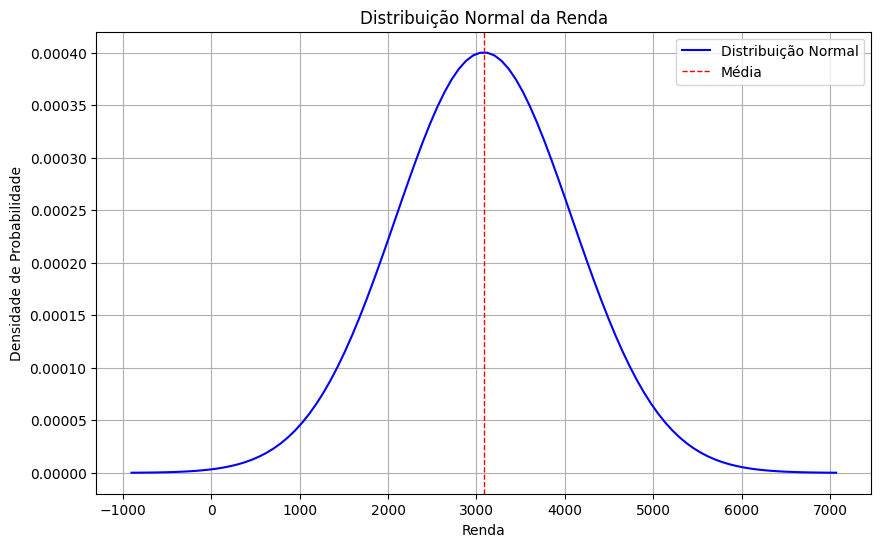

In [ ]:
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f'Média da renda: {media_renda:.2f}')
print(f'Variância da renda: {variancia_renda:.2f}')

x = np.linspace(media_renda - 4 * np.sqrt(variancia_renda),
                media_renda +4 * np.sqrt(variancia_renda), 100)
y = (1 / (np.sqrt(2 * np.pi * variancia_renda))) * np.exp(-0.5 * ((x - media_renda) ** 2) / variancia_renda)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=1, label='Média')
plt.legend()
plt.grid()
plt.show()

#6

Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra de
população brasileira com 1 milhão de habitantes, qual a probabilidade de
encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
def probabilidade_pos_graduacao(df, escolaridade='Pós-graduação'):
  total_pessoas = len(df)
  pessoas_pos_graduacao = df[df['escolaridade'] == escolaridade]
  num_pos_graduacao = len(pessoas_pos_graduacao)

  prob_pos_graduacao = num_pos_graduacao / total_pessoas
  return prob_pos_graduacao

probabilidade = probabilidade_pos_graduacao(df)

n = 1_000_000
k = 243_000

mu = n * probabilidade
sigma = (n * probabilidade * (1 - probabilidade)) ** 0.5

z = (k - mu) / sigma
probabilidade_encontrar_k = norm.cdf(z)

print(f'A probabilidade de encontrar {k} pessoas com pós-graduação em 1 milhão é: {probabilidade_encontrar_k * 100:.2f}%')
print(f'Probabilidade de ter pós-graduação: {probabilidade * 100:.2f}%')
print(f'Média (μ): {mu:.2f}')
print(f'Desvio Padrão (σ): {sigma:.2f}')
print(f'Valor z: {z:.2f}')

A probabilidade de encontrar 243000 pessoas com pós-graduação em 1 milhão é: 0.00%
Probabilidade de ter pós-graduação: 25.30%
Média (μ): 253000.00
Desvio Padrão (σ): 434.73
Valor z: -23.00


#7

Somando as densidades nós temos a função de densida de acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade

In [ ]:
frequencias = df['escolaridade'].value_counts()

proporcoes = frequencias / len(df)

densidade_acumulada = proporcoes.cumsum()

resultado = pd.DataFrame({
    'Frequência': frequencias,
    'Proporção': proporcoes,
    'Densidade Acumulada': densidade_acumulada
})

print(resultado)

               Frequência  Proporção  Densidade Acumulada
escolaridade                                             
Fundamental           266      0.266                0.266
Pós-graduação         253      0.253                0.519
Superior              243      0.243                0.762
Médio                 238      0.238                1.000


#8

Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
n = len(df)

num_intermediario = len(df[df['nível de proficiência em inglês'] == 'Intermediário'])
p = num_intermediario / n

z = norm.ppf(0.975)

margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f'A margem de erro amostral para a proporção de pessoas com nível de inglês intermediário é: {margem_erro * 100:.2f}%')

A margem de erro amostral para a proporção de pessoas com nível de inglês intermediário é: 2.91%


#9

Calcula a renda média da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
media_renda = df['renda'].mean()
limite_superior = media_renda + 1000

num_pessoas_acima_limite = len(df[df['renda'] > limite_superior])

p = num_pessoas_acima_limite / len(df)
n = len(df)

probabilidade = p * n

print(f'O número esperado de pessoas com renda mil reais superior à média é: {probabilidade:.2f}')
print(f'A proporção de pessoas com renda acima do limite é: {p * 100:.2f}%')

O número esperado de pessoas com renda mil reais superior à média é: 161.00
A proporção de pessoas com renda acima do limite é: 16.10%


#10

Qual é a probabilidade de escolhermos uma pessoa residente na região
Sudeste que seja homem, tenha apenas ensino fundamental completo e
possua renda mensal superior a 2 mil reais?

In [ ]:
siglas_sudeste = ['SP', 'RJ', 'MG', 'ES']
df_sudeste = df[df['estado'].isin(siglas_sudeste)]

df_filtrado = df_sudeste[(df_sudeste['sexo'] == 'M') &
                          (df_sudeste['escolaridade'] == 'Fundamental') &
                          (df_sudeste['renda'] > 2000)]

probabilidade = len(df_filtrado) / len(df_sudeste)

print(f'A probabilidade de escolher uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais é: {probabilidade * 100:.2f}%')

A probabilidade de escolher uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais é: 12.10%
